## Importation des bibliothèques et du jeu de données

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

<ul>
<li>age = âge du patient</li>
<li>sex = sexe du patient</li>
<li>cp = type de douleur thoracique</li>
<ul>
    <li>1 : angine typique</li>
    <li>2 : angine atypique</li>
    <li>3 : douleur non angineuse</li>
    <li>4 : asymptomatique</li>
</ul>
<li>trbps = tension artérielle au repos (en mm Hg)</li>
<li>chol : cholestérol en mg/dl mesuré via BMI sensor</li>
<li>fbs : glycémie dans le sang > 120 mg/dl) (1 = true; 0 = false)</li>
<li>restecg : résultats électrocardiographiques au repos</li>
<ul>
    <li>0: normal</li>
    <li>1: présentant une anomalie de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression du segment ST > 0,05 mV)</li>
    <li>2: montrant une hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes</li>
</ul>
<li>thalach : fréquence cardiaque maximale atteinte</li>
<li>exng = exercice indiquant une angine (yes/no)</li>
<li>caa = nb de vaisseaux majeurs (0 à 3)</li>
<li>output : « moins de chance » = moins de chance de crise cardiaque « plus de chance » = plus de chance de crise cardiaque</li>
</ul><br>
Il n'y a pas d'indication pour les colonnes 'thall', 'slp' et 'oldpeak' ! Pour oldpeak (ancien pic), cela semple indiquer une valeur quantitative. Après recherche, le thalium pourrait correspondre à 'thall', nottament la technique 'Scintigraphie avec thallium'. Quid de slp ?


In [2]:
data = pd.read_csv('données_médicales.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [9]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


Aucune valeur ne manque dans le dataframe => pas de traitement des valeurs non-null ou absente !

Remplacement des trois valeurs non numériques !

In [10]:

data['sex_tr'] = preprocessing.LabelEncoder().fit_transform(data['sex'])
data['exng_tr'] = preprocessing.LabelEncoder().fit_transform(data['exng'])
data['output_tr'] = preprocessing.LabelEncoder().fit_transform(data['output'])

In [11]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,sex_tr,exng_tr,output_tr
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance,1,0,1
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance,1,0,1
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance,0,0,1
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance,1,0,1
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance,0,1,1


Trois nouvelles colonnes sont bien apparues, correspondant aux valeurs catégoriques transformées en valeurs numériques.

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trtbps'}>,
        <AxesSubplot: title={'center': 'chol'}>],
       [<AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalachh'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>],
       [<AxesSubplot: title={'center': 'slp'}>,
        <AxesSubplot: title={'center': 'caa'}>,
        <AxesSubplot: title={'center': 'thall'}>,
        <AxesSubplot: title={'center': 'sex_tr'}>],
       [<AxesSubplot: title={'center': 'exng_tr'}>,
        <AxesSubplot: title={'center': 'output_tr'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

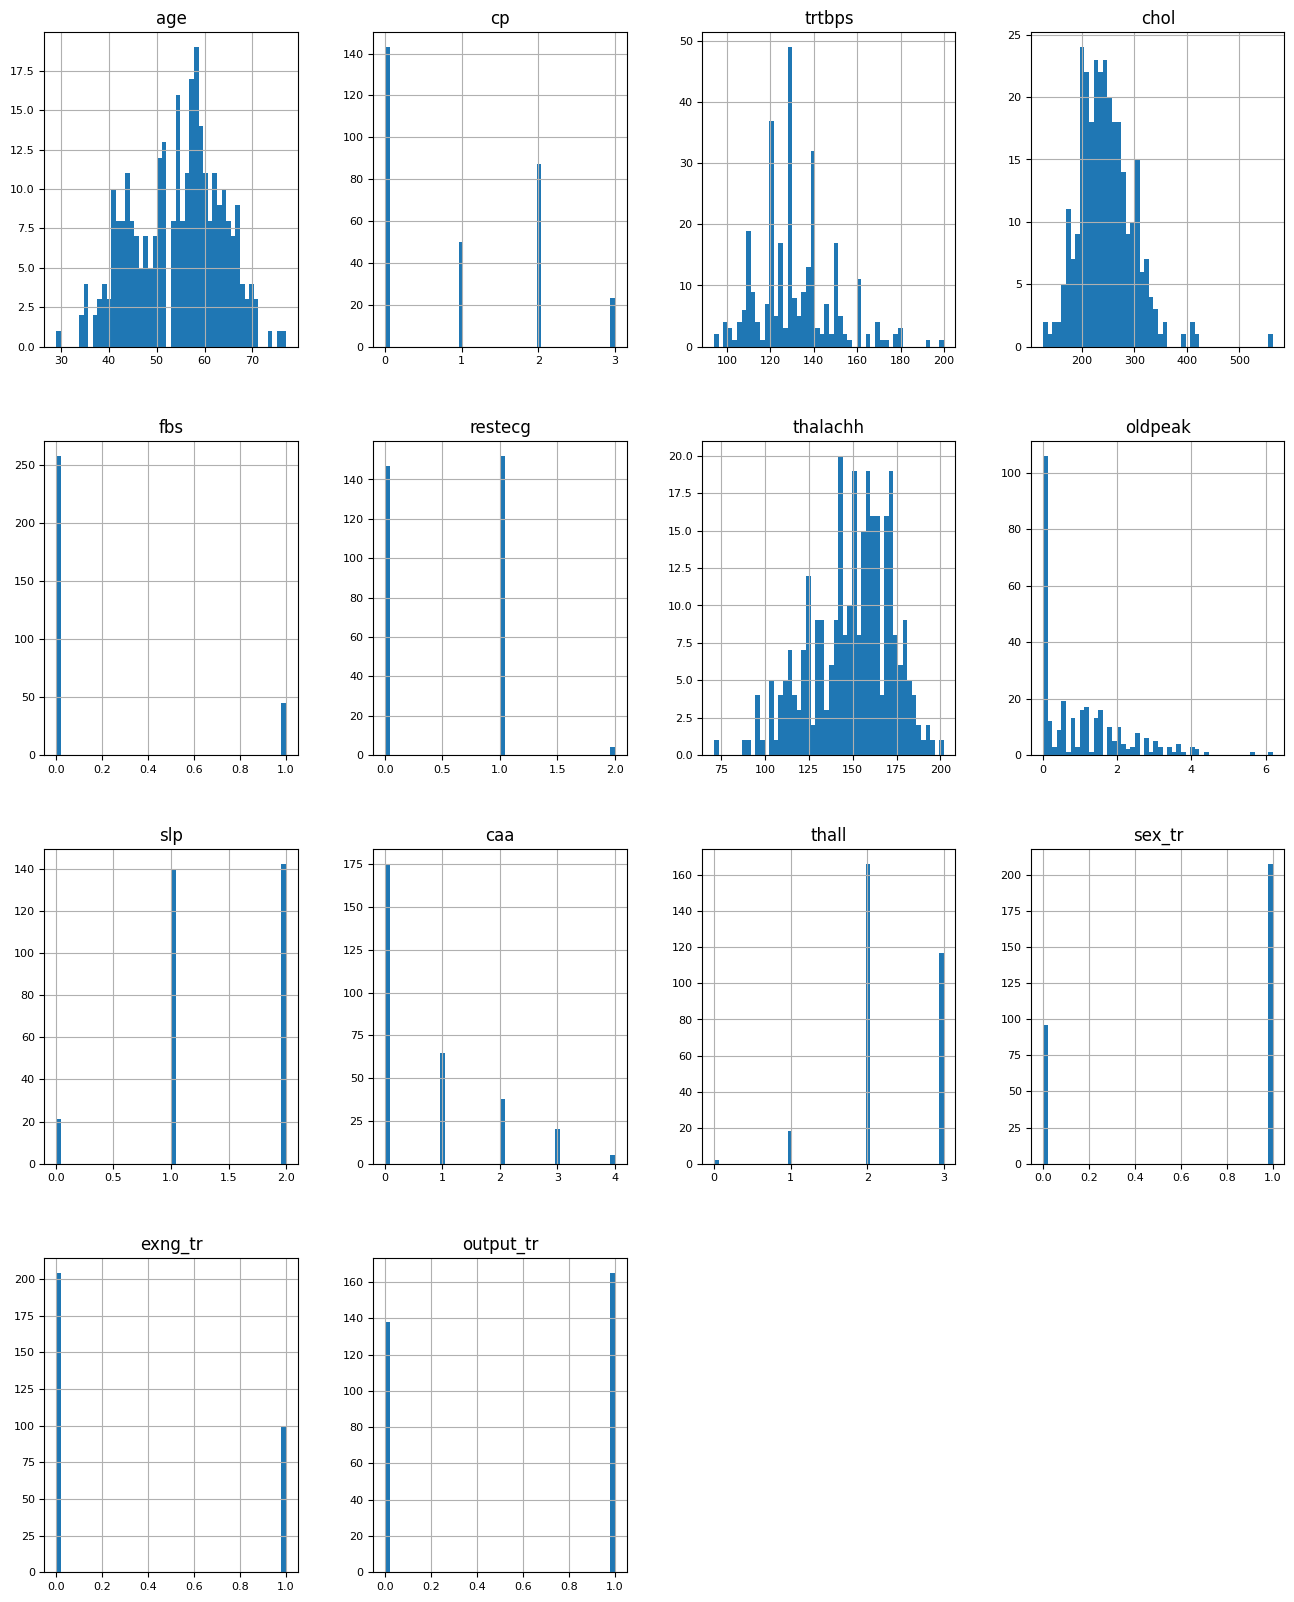

In [12]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Par l'étude des différents graphiques, on remarque la présence de valeurs abérrantes aux niveaux du cholestérol qu'il faudra supprimer. <br>
Dans la population étudiée, les femmes ne représentent que la moitié des hommes. Car elle possède un risque plus faible de crise cardiaque ?<br>
La proportion de risque de faire ou non une crise cardiaque est assez bien répartie.
